In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy
import statsmodels as sm
import statsmodels.api as smi
import scipy.stats as scs
import scienceplots
from scipy.stats import norm
#plt.style.use('seaborn-v0_8')
plt.style.use(['science','notebook','grid'])

# Functions 


In [2]:
def calculate_metrics(price_series):
    log_ret = np.log(price_series) - np.log(price_series).shift(1)
    avg_ret = log_ret.mean() * 252
    avg_std=log_ret.std()*np.sqrt(252)
    z=norm.ppf(0.05)
    #VaR parametrico 
    var95_p=-(avg_ret+z*avg_std)
    #VaR empirico 
    var95_e = -log_ret.quantile(0.05)
    es95_p=log_ret[log_ret<log_ret.quantile(0.05)].mean()*252
    DD=price_series/price_series.cummax()-1
    max_DD=DD.min()
    downside_std=log_ret[log_ret<0].std()*np.sqrt(252) #standard deviation dei soli rendimenti negativi

    return log_ret,avg_ret, avg_std, var95_p,var95_e, es95_p, max_DD, downside_std


def get_data(tickers,start,end):
    df=yf.download(tickers,start=start,end=end,interval='1d',group_by='ticker')
    df = df.xs('Close', axis=1, level=1) #serve ad accedere al livello corretto del dataset da quando yfinance è stato aggiornato
    return df

def describestat(array):
  p=scs.describe(array)
  print('statistic values')
  print("%14s %15.5f" % ('size',p[0]))
  print("%14s %15.5f" % ('min',p[1][0]))
  print("%14s %15.5f" % ('max',p[1][1]))
  print("%14s %15.5f" % ('mean',p[2]))
  print("%14s %15.5f" % ('std',p[3]))
  print("%14s %15.5f" % ('skewness',p[4]))
  print("%14s %15.5f" % ('kurtosis',p[5]))

# Load Data

In [3]:
df_FF=pd.read_csv('/Users/alessandro/Desktop/γνώση/python/script/dataset/F-F_Research_Data_5_Factors_2x3_daily.csv',skipfooter=1,engine='python')
df_FF.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_FF['Date'] = pd.to_datetime(df_FF['Date'], format='%Y%m%d')
df_FF.set_index('Date',inplace=True)
df_FF.dropna(inplace=True)



# Import financial data

In [4]:
tickers=['PEP','GOOGL','AMZN','ENEL.MI','ISP.MI','NVDA','BMY','GOLD.AS']
end=dt.datetime.now()
start=end-dt.timedelta(days=1000)
df_assets= get_data(tickers,start,end)
df_assets.dropna(inplace=True)
df_assets.describe().T

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  8 of 8 completed


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
GOOGL,673.0,144.318321,30.775391,82.932625,122.932732,146.572556,168.946777,205.893341
GOLD.AS,673.0,92.781743,19.148211,64.714996,77.363998,85.742996,105.371002,135.888000
AMZN,673.0,160.766820,43.360779,81.820000,127.129997,172.339996,192.720001,242.059998
ENEL.MI,673.0,5.828692,0.972004,3.729506,5.174850,5.722764,6.557937,7.976632
BMY,673.0,52.946353,7.915026,37.686237,46.845440,52.111320,58.441181,72.012856
PEP,673.0,159.458196,12.227967,127.055870,154.326965,161.462906,168.188171,182.348953
NVDA,673.0,80.924078,46.633839,13.203882,42.154053,84.637306,124.540657,175.404999
ISP.MI,673.0,2.950036,1.022157,1.518110,2.017905,2.784757,3.622611,5.085000


In [5]:
log_ret,avg_ret, avg_std, var95_p,var95_e, es95_p, max_DD, downside_std= calculate_metrics(df_assets)

# Visualization

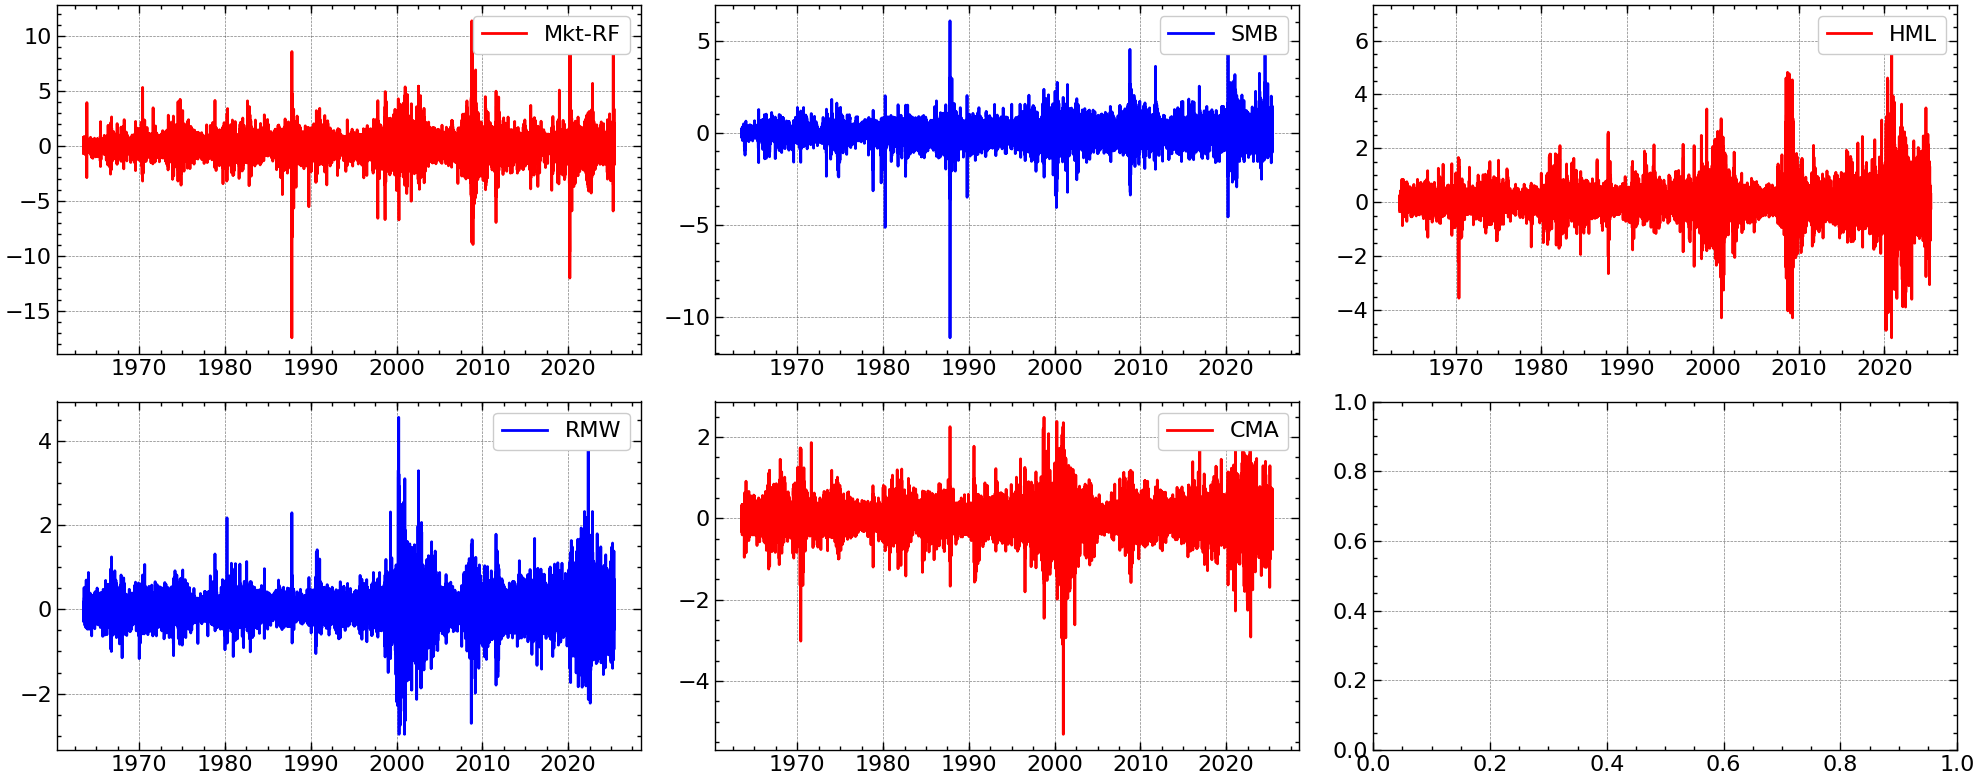

In [6]:
fig,axes=plt.subplots(2,3,figsize=(20,8))
ax=axes[0][0]
ax.plot(df_FF.index,df_FF['Mkt-RF'],label='Mkt-RF',color='red')
ax.legend(loc='upper right')
###
ax=axes[0][1]
ax.plot(df_FF.index,df_FF['SMB'],label='SMB',color='blue')
ax.legend(loc='upper right')
###
ax=axes[0][2]
ax.plot(df_FF.index,df_FF['HML'],label='HML',color='red')
ax.legend(loc='upper right')
###
ax=axes[1][0]
ax.plot(df_FF.index,df_FF['RMW'],label='RMW',color='blue')
ax.legend(loc='upper right')
###
ax=axes[1][1]
ax.plot(df_FF.index,df_FF['CMA'],label='CMA',color='red')
ax.legend(loc='upper right')
###
plt.tight_layout()
plt.show()



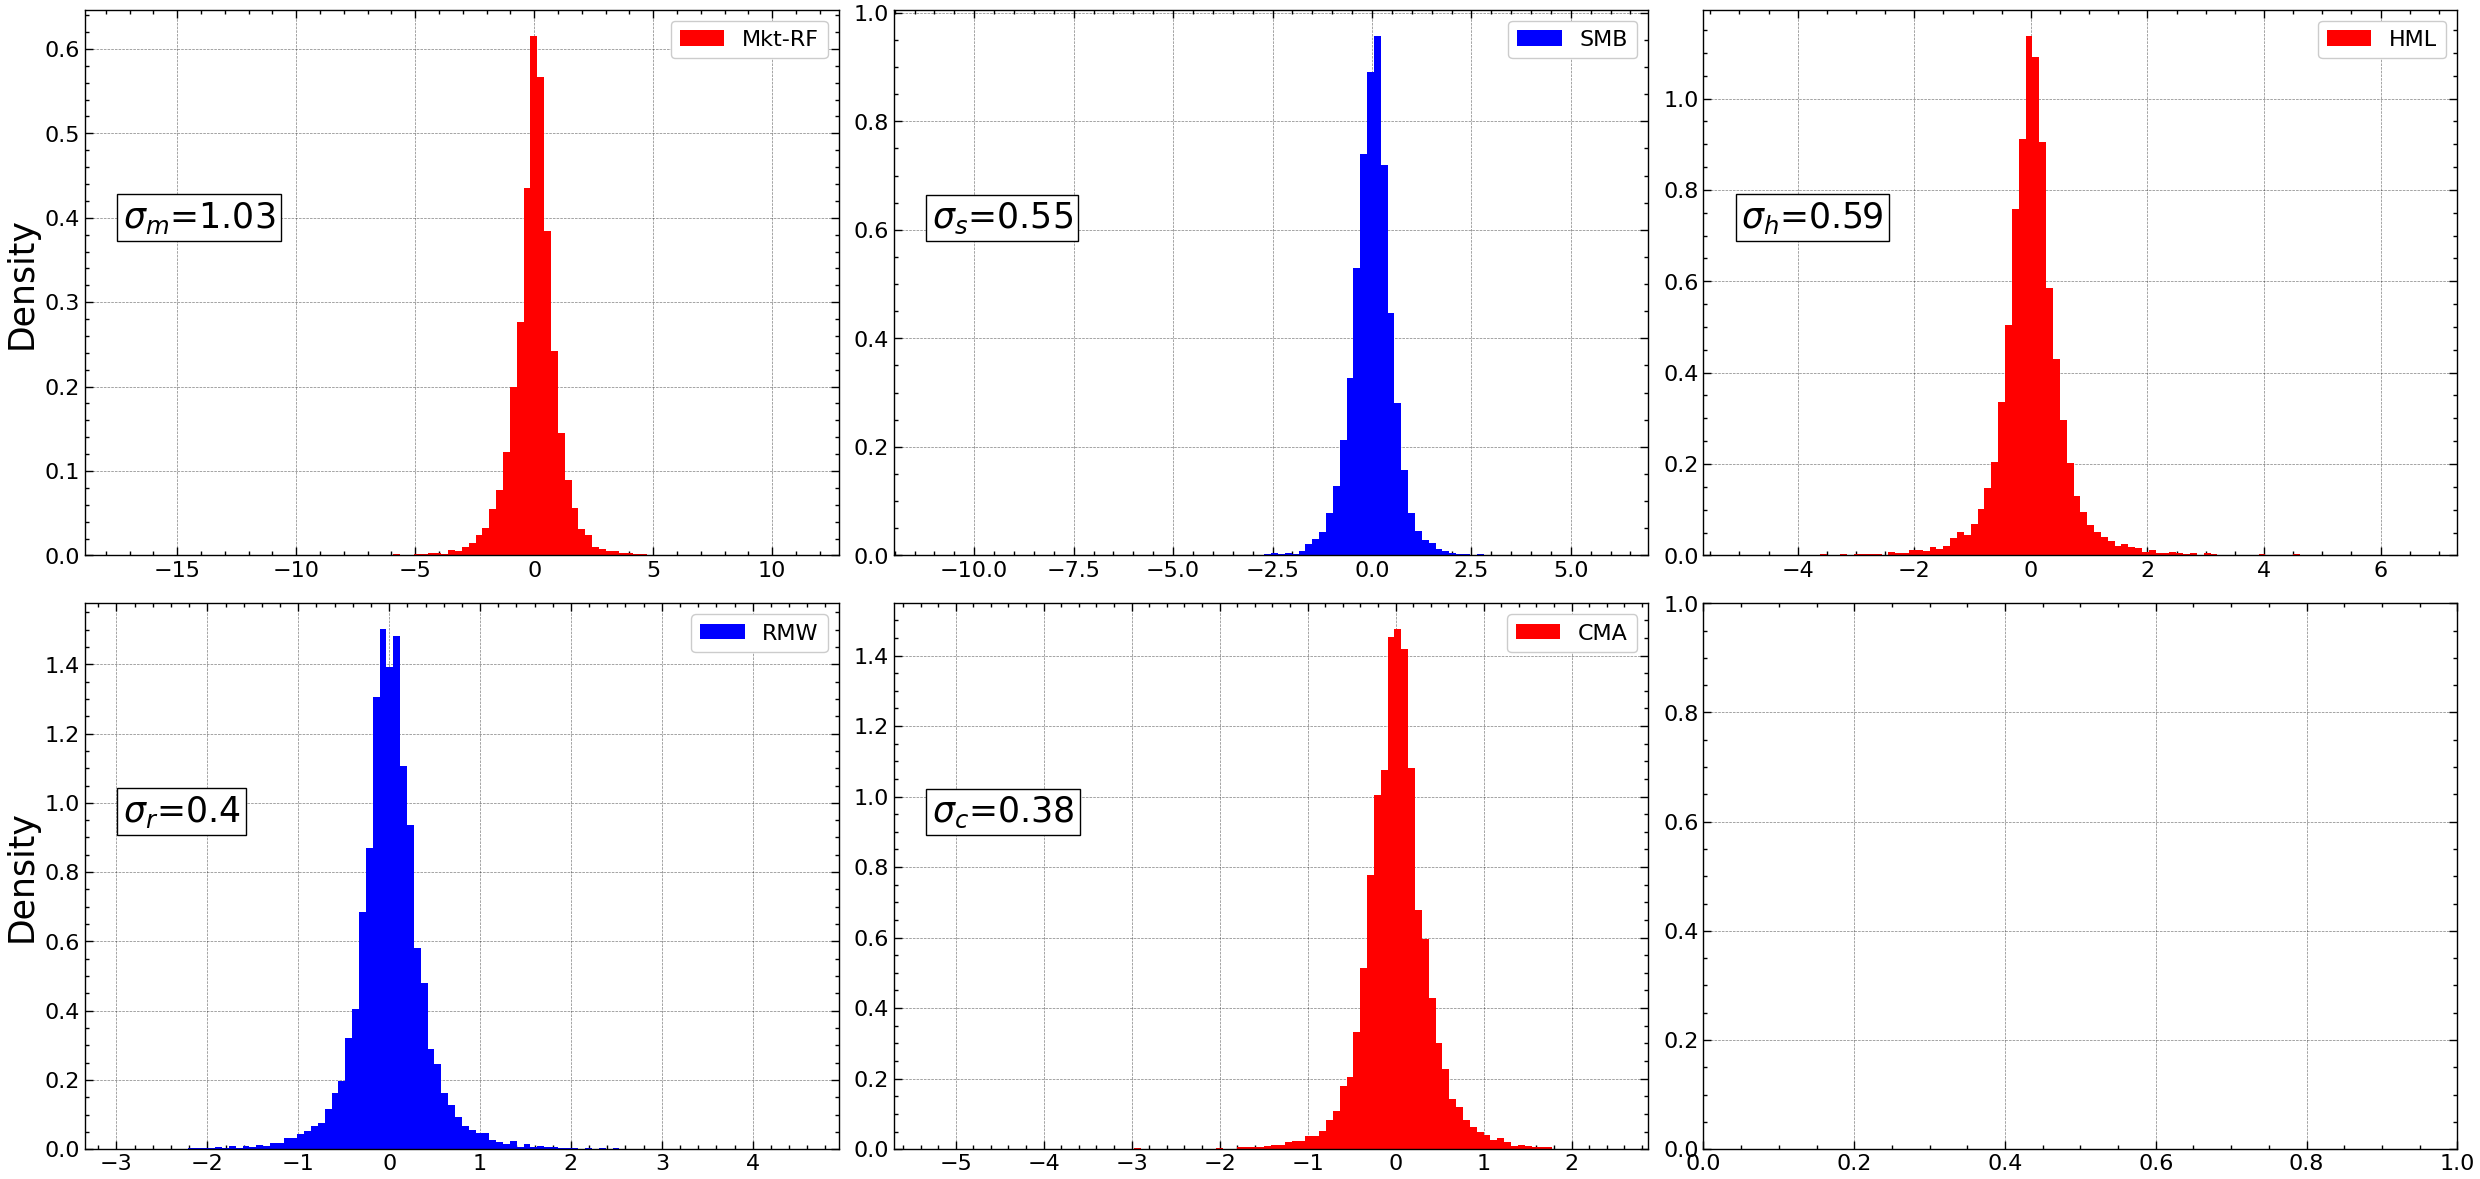

In [7]:
fig,axes=plt.subplots(2,3,figsize=(25,12))
ax=axes[0][0]
ax.hist(df_FF['Mkt-RF'],bins=100,density=True,label='Mkt-RF',color='red')
ax.text(0.05,0.6,f"$\sigma_m$={round(np.std(df_FF['Mkt-RF']),2)}",transform=ax.transAxes,fontsize=25,bbox=dict(facecolor='white',edgecolor='black'))
ax.set_ylabel('Density',fontsize=25)
ax.legend()
###
ax=axes[0][1]
ax.hist(df_FF['SMB'],bins=100,density=True,label='SMB',color='blue')
ax.text(0.05,0.6,f"$\sigma_s$={round(np.std(df_FF['SMB']),2)}",transform=ax.transAxes,fontsize=25,bbox=dict(facecolor='white',edgecolor='black'))
ax.legend()
###
ax=axes[0][2]
ax.hist(df_FF['HML'],bins=100,density=True,label='HML',color='red')
ax.text(0.05,0.6,f"$\sigma_h$={round(np.std(df_FF['HML']),2)}",transform=ax.transAxes,fontsize=25,bbox=dict(facecolor='white',edgecolor='black'))
ax.legend()
###
ax=axes[1][0]
ax.hist(df_FF['RMW'],bins=100,density=True,label='RMW',color='blue')
ax.text(0.05,0.6,f"$\sigma_r$={round(np.std(df_FF['RMW']),2)}",transform=ax.transAxes,fontsize=25,bbox=dict(facecolor='white',edgecolor='black'))
ax.set_ylabel('Density',fontsize=25)
ax.legend()
###
ax=axes[1][1]
ax.hist(df_FF['CMA'],bins=100,density=True,label='CMA',color='red',)
ax.text(0.05,0.6,f"$\sigma_c$={round(np.std(df_FF['CMA']),2)}",transform=ax.transAxes,fontsize=25,bbox=dict(facecolor='white',edgecolor='black'))
ax.legend()
###

plt.tight_layout()
plt.show()

# Fama-French Factors

In [8]:
df_finale= pd.merge(log_ret*100,df_FF,left_index=True,right_index=True,how='inner')
df_finale.dropna(inplace=True)
df_finale

,GOOGL,GOLD.AS,AMZN,ENEL.MI,BMY,PEP,NVDA,ISP.MI,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,,,,,,,,
2022-11-02,-3.945506,0.175638,-4.945159,1.160786,-0.322273,-1.403904,-2.421468,-0.020564,-2.67,-0.84,1.60,0.31,1.16,0.014
2022-11-03,-4.155530,-1.254558,-3.109058,-0.403655,1.321127,-0.258412,1.516538,1.267126,-1.03,0.39,0.28,-0.04,0.04,0.014
2022-11-04,3.706094,2.889178,1.863822,2.280324,0.381537,0.560907,5.331799,4.729984,1.16,-0.25,1.28,2.33,0.65,0.014
2022-11-07,2.182062,0.263872,-0.495847,1.231815,0.519104,0.796688,1.019099,3.052201,0.87,-0.33,0.60,1.10,1.01,0.014
2022-11-08,0.462267,2.134619,-0.609381,0.976754,0.992662,0.277070,2.082901,0.888488,0.51,-0.53,-0.40,-0.16,0.05,0.014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,-1.414532,1.917175,-1.044332,-0.555440,-0.383471,-0.601253,-1.166156,-3.555561,-0.67,0.07,0.39,-0.33,-0.02,0.018
2025-05-27,2.595566,-1.870512,2.471809,-0.111476,0.085348,1.557310,3.156298,1.938165,2.07,0.46,-0.28,0.12,0.39,0.018
2025-05-28,-0.312802,-0.013000,-0.633007,-0.434642,0.170471,-0.534267,-0.510518,-0.041285,-0.62,-0.44,-0.23,-0.22,0.25,0.018


In [9]:
for i in df_finale:
    df_finale[f'excess_return_{i}']=df_finale[i]-df_finale['RF']


In [10]:
df_finale.columns

Index(['GOOGL', 'GOLD.AS', 'AMZN', 'ENEL.MI', 'BMY', 'PEP', 'NVDA', 'ISP.MI',
       'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'excess_return_GOOGL',
       'excess_return_GOLD.AS', 'excess_return_AMZN', 'excess_return_ENEL.MI',
       'excess_return_BMY', 'excess_return_PEP', 'excess_return_NVDA',
       'excess_return_ISP.MI', 'excess_return_Mkt-RF', 'excess_return_SMB',
       'excess_return_HML', 'excess_return_RMW', 'excess_return_CMA',
       'excess_return_RF'],
      dtype='object')

In [11]:
X=df_finale.loc[:,['Mkt-RF','SMB','HML','CMA','RMW']]
X=smi.add_constant(X)
Y=df_finale.loc[:,['excess_return_GOOGL', 'excess_return_AMZN', 'excess_return_ISP.MI',
       'excess_return_PEP', 'excess_return_ENEL.MI', 'excess_return_NVDA',
       'excess_return_BMY']]

In [12]:
l={}
for i in Y:
    model=smi.OLS(Y[i],X)
    results=model.fit()
    l[i]=results.params
    print(results.summary())


                             OLS Regression Results                            
Dep. Variable:     excess_return_GOOGL   R-squared:                       0.482
Model:                             OLS   Adj. R-squared:                  0.478
Method:                  Least Squares   F-statistic:                     116.9
Date:                 Mon, 28 Jul 2025   Prob (F-statistic):           2.99e-87
Time:                         19:36:38   Log-Likelihood:                -1124.6
No. Observations:                  633   AIC:                             2261.
Df Residuals:                      627   BIC:                             2288.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0199      0.058     -0.34

In [15]:
Tab=pd.DataFrame(l).T
#Tab.to_excel('fama_french_results.xlsx')
Tab

,const,Mkt-RF,SMB,HML,CMA,RMW
excess_return_GOOGL,-0.019939,1.055817,-0.017232,-0.521479,-0.658999,0.412488
excess_return_AMZN,-0.015596,1.246859,-0.142863,-0.359359,-1.017540,-0.129549
excess_return_ISP.MI,0.149737,0.452827,-0.097323,0.596807,-0.018846,-0.165749
excess_return_PEP,-0.080931,0.310563,-0.186856,0.168603,0.207721,0.216190
excess_return_ENEL.MI,0.089128,0.208303,-0.043934,0.339402,-0.116500,-0.106607
excess_return_NVDA,0.174829,1.970977,-0.536045,-1.325155,0.273207,0.391283
excess_return_BMY,-0.071907,0.311182,0.200933,0.227455,0.325536,0.020117


# PCA

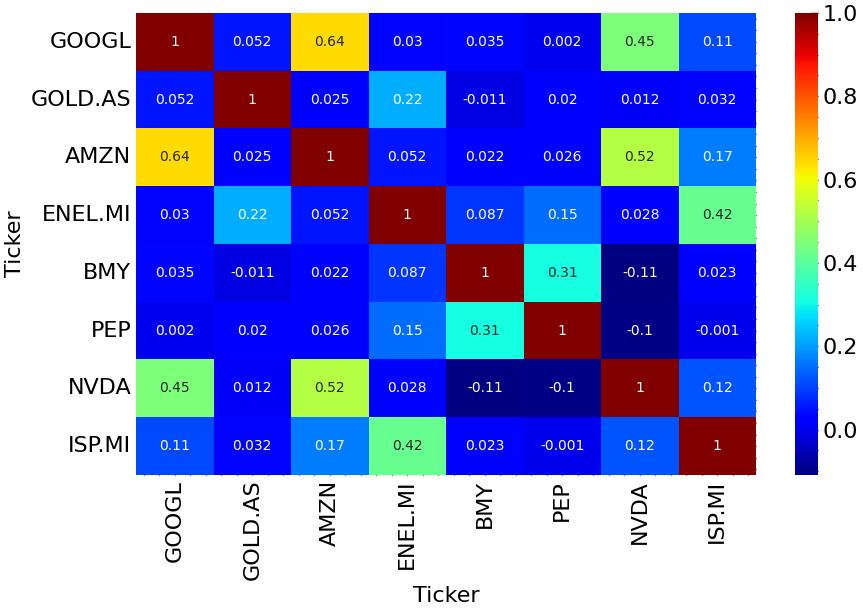

The average correlation between the assets is 0.106


In [16]:
#let's look at the correlation
corr=log_ret.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,cmap='jet',annot=True)
plt.show()
average_corelation=(corr.sum().sum()-len(corr))/(len(corr)*len(corr)-1)
print(f'The average correlation between the assets is {round(average_corelation,3)}')
if average_corelation >= 0.5:
    print('High level of correlation! Look for multicollinearity')


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
log_ret_scaled = StandardScaler().fit_transform(log_ret.dropna())
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(log_ret_scaled)

# Create DataFrame with principal components
pca_df = pd.DataFrame(
    pca_result,
    columns=[f'PC{i+1}' for i in range(len(log_ret.columns))]
)


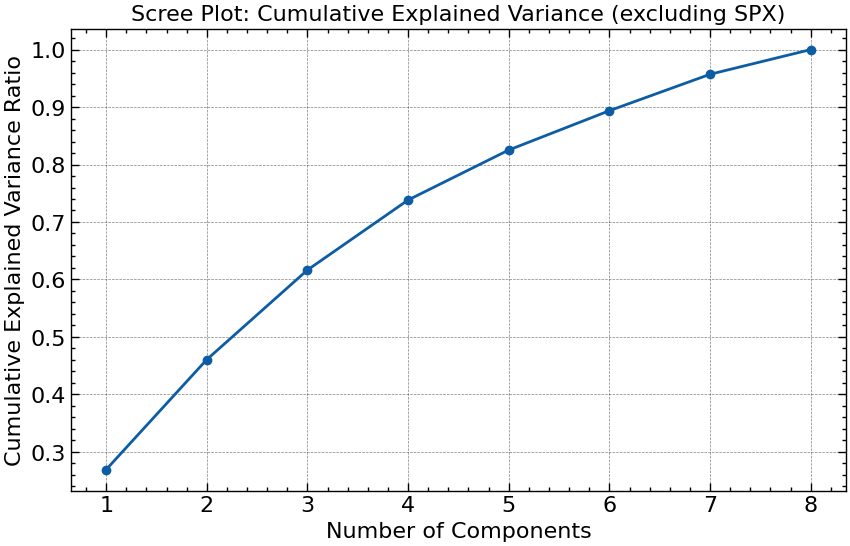

Explained variance ratio for first 5 components:
PC1: 0.269
PC2: 0.191
PC3: 0.156
PC4: 0.122
PC5: 0.087


In [42]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot: Cumulative Explained Variance (excluding SPX)')
plt.grid(True)
plt.show()

# Print explained variance for first 3 components
print("Explained variance ratio for first 5 components:")
for i, ratio in enumerate(pca.explained_variance_ratio_[:5]):
    print(f"PC{i+1}: {ratio:.3f}")

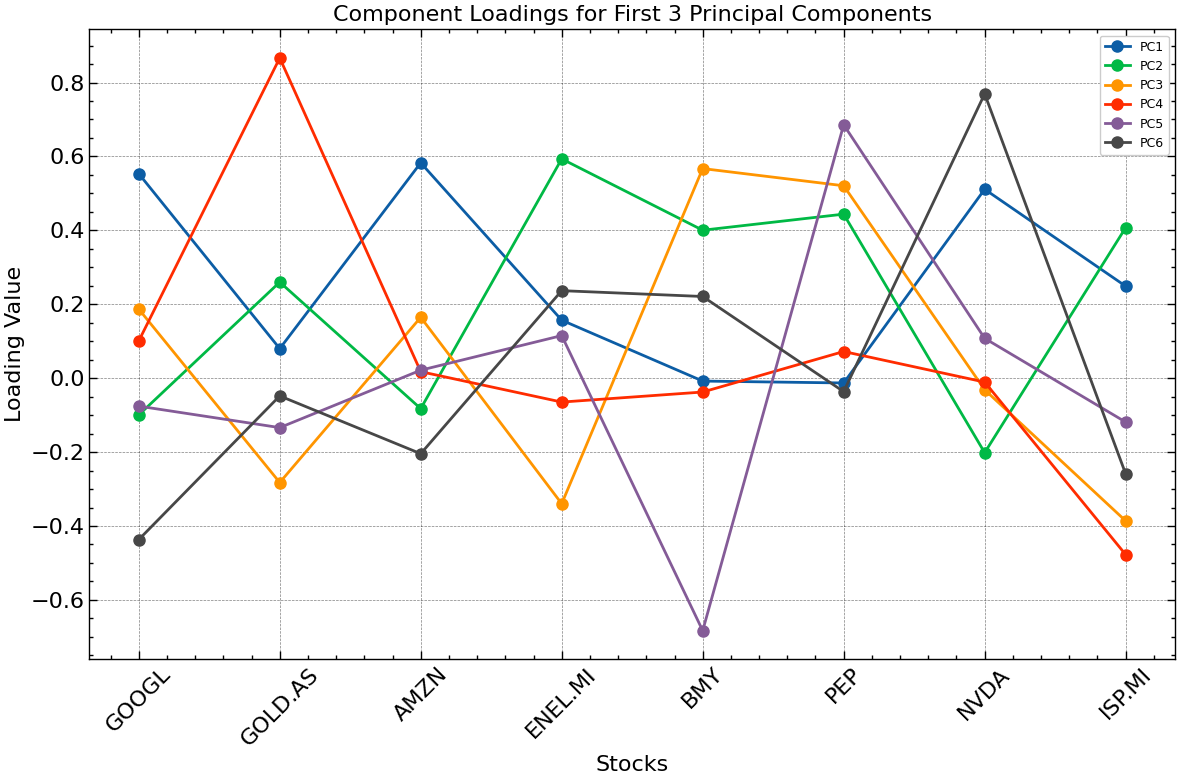

Top contributors to each principal component:

PC1:
AMZN: 0.583
GOOGL: 0.553
NVDA: 0.511
ISP.MI: 0.249
ENEL.MI: 0.157
GOLD.AS: 0.080

PC2:
ENEL.MI: 0.593
PEP: 0.444
ISP.MI: 0.407
BMY: 0.400
GOLD.AS: 0.260
NVDA: 0.202

PC3:
BMY: 0.567
PEP: 0.521
ISP.MI: 0.386
ENEL.MI: 0.340
GOLD.AS: 0.282
GOOGL: 0.187

PC4:
GOLD.AS: 0.866
ISP.MI: 0.478
GOOGL: 0.101
PEP: 0.072
ENEL.MI: 0.065
BMY: 0.038

PC5:
PEP: 0.686
BMY: 0.683
GOLD.AS: 0.134
ISP.MI: 0.119
ENEL.MI: 0.115
NVDA: 0.108

PC6:
NVDA: 0.769
GOOGL: 0.437
ISP.MI: 0.259
ENEL.MI: 0.237
BMY: 0.221
AMZN: 0.204


In [29]:
# Get component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(log_ret.columns))],
    index=log_ret.columns
)

# Plot loadings for first 3 PCs on a single plot
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.plot(loadings.index, loadings[f'PC{i+1}'], 
             marker='o', 
             linewidth=2, 
             markersize=8,
             label=f'PC{i+1}')

plt.title('Component Loadings for First 3 Principal Components')
plt.xlabel('Stocks')
plt.ylabel('Loading Value')
plt.grid(True)
plt.legend(loc='upper right',fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print top contributors for each PC
print("Top contributors to each principal component:")
for i in range(6):
    print(f"\nPC{i+1}:")
    top_contributors = loadings[f'PC{i+1}'].abs().sort_values(ascending=False).head(6)
    for stock, loading in top_contributors.items():
        print(f"{stock}: {loading:.3f}")

In [ ]:
#let's analysze the rolling dynamic principal components
log_ret.dropna(inplace=True)
window=60
rolling_pca=[]
for i in range(window,len(log_ret)):
    window_data=log_ret.iloc[i-window:i]
    window_scaled = StandardScaler().fit_transform(window_data)
    pca_window=PCA()
    pca_window.fit(window_scaled)
    rolling_pca.append(pca_window.explained_variance_ratio_[:6])


rolling_df= pd.DataFrame(rolling_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])



RangeIndex(start=0, stop=612, step=1)

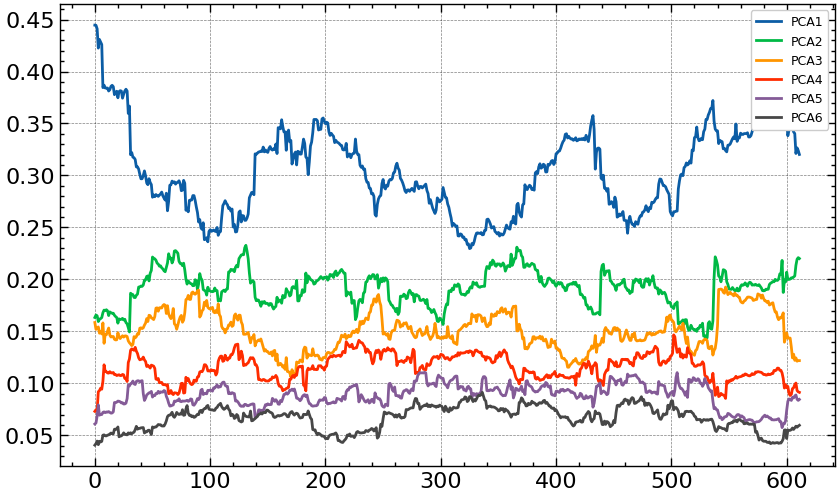

In [40]:
plt.figure(figsize=(10,6))
for col in rolling_df:
    plt.plot(rolling_df[col],label=col)

plt.legend(loc='upper right',fontsize=9)
plt.show()